<a href="https://colab.research.google.com/github/yeyxo/Project2/blob/main/LMFAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#import the LMFAO data

link = 'https://drive.google.com/file/d/14bggoqhCuCDRw_5gPLN7CdoBg15teO9Z/view?usp=sharing'
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('LMFAO.csv') 

In [ ]:
import pandas as pd
import numpy as np
import scipy
import gensim
import re
#1=spam 0=comment
LMFAO = pd.read_csv('LMFAO.csv')
LMFAO = pd.read_csv('LMFAO.csv', usecols = ['CLASS', 'CONTENT'])
LMFAO.head()


,CONTENT,CLASS
0,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,wierd but funny﻿,0
2,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Party Rock....lol...who wants to shuffle!!!﻿,0
4,Party rock﻿,0


In [ ]:
import string 
LMFAO['CONTENT']=[re.sub(r'\W',' ',str(x)) for x in LMFAO['CONTENT']]
LMFAO['CONTENT'] = LMFAO['CONTENT'].str.replace(r'[^\w\s]+', '')
LMFAO

,CONTENT,CLASS
0,a href http www youtube com watch v KQ6zr6...,0
1,wierd but funny,0
2,Hey guys I 39 m a human br br br Bu...,1
3,Party Rock lol who wants to shuffle,0
4,Party rock,0
...,...,...
433,Like this comment for no reason,1
434,love this song,0
435,this song is awesome these guys are the best ...,1
436,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  #Import Random Forest Model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics


In [ ]:
vectorizer = TfidfVectorizer (stop_words=STOPWORDS)
features = vectorizer.fit_transform(LMFAO['CONTENT']).toarray()

In [ ]:
from sklearn import preprocessing
X = features #Features
y = LMFAO['CLASS'] # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
clf=RandomForestClassifier(n_estimators=100) #Create a Gaussian Classifier

clf.fit(X_train,y_train) #Train the model using the training sets y_pred=clf.predict(X_test)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9393939393939394


# ***LIME***

In [ ]:
!pip install lime
import lime
from lime import lime_tabular
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
c = make_pipeline(vectorizer,clf)

In [ ]:
print(c.predict_proba([LMFAO['CONTENT'][0]]))

[[0.81 0.19]]


In [ ]:
# 1 is SPAM, 0 is NOT SPAM
class_names=[0,1]
explainer = LimeTextExplainer(class_names=class_names)

In [ ]:
idx=5
exp = explainer.explain_instance(LMFAO['CONTENT'][idx], c.predict_proba, num_features=10)
print('Document id: %d' % idx)
print('Probability(1) =', c.predict_proba([LMFAO['CONTENT'][idx]])[0, 1])
print('True class: %s' % class_names[LMFAO['CLASS'][idx]])

Document id: 5
Probability(1) = 0.01
True class: 0


In [ ]:
exp.as_list()

[('Shuffle', -0.003851618908845453)]

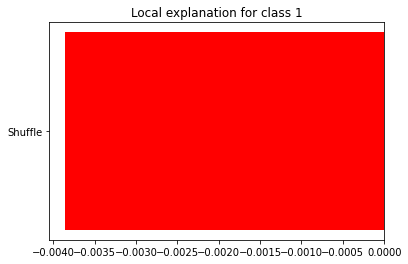

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()